In [1]:
from qiskit import QuantumCircuit 
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector, plot_state_qsphere
from math import sqrt, pi

In [2]:
#Setting up the simulator (making new simulator object)

sim = AerSimulator()

In [3]:
#Now running the circuit again to get the statevector
#Setting up the circuit - first run is for a 2 qbit system without entanglement
qc = QuantumCircuit(2) #Setting up a quantum circuit with two qubit
qc.h(0) #Hadamard gate on qubit 0
qc.x(1) #XGate on on qubit 1
qc.save_statevector() #Ensure that I have access to the statevector - this needs to be at the right place in the circuit!
qc.measure_all() #setting up the measurement
qc.draw() #Drawing the circuit

┌───┐ ░  ░ ┌─┐   
   q_0: ┤ H ├─░──░─┤M├───
        ├───┤ ░  ░ └╥┘┌─┐
   q_1: ┤ X ├─░──░──╫─┤M├
        └───┘ ░  ░  ║ └╥┘
meas: 2/════════════╩══╩═
                    0  1

In [4]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results

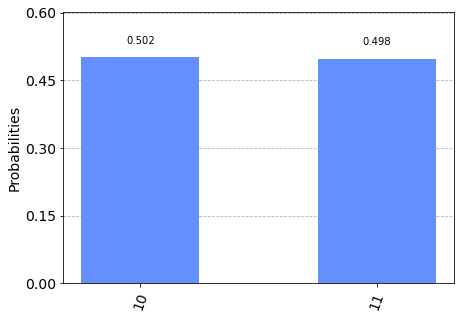

In [5]:
vector_value = result.get_counts()
plot_histogram(vector_value)

In [7]:
final_state = result.get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

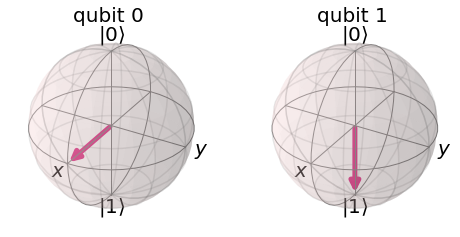

In [8]:
#Plotting the bloch vector - this works because there is no entanglement
plot_bloch_multivector(final_state)

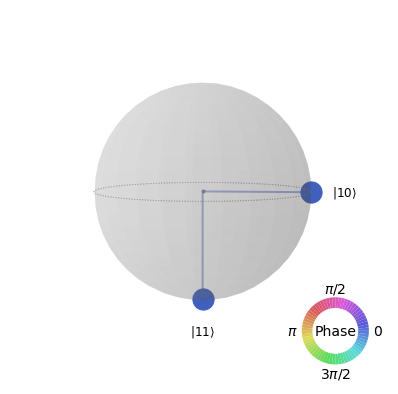

In [9]:
#IBM uses something called a Qsphere for visuialization for statevectors in multi-qubit systems
plot_state_qsphere(final_state)

In [15]:
#Creating an entangled state
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.save_statevector() #Ensure that I have access to the statevector - this needs to be at the right place in the circuit!
qc.measure_all()
qc.draw()

┌───┐      ░  ░ ┌─┐   
   q_0: ┤ H ├──■───░──░─┤M├───
        └───┘┌─┴─┐ ░  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──░──╫─┤M├
             └───┘ ░  ░  ║ └╥┘
meas: 2/═════════════════╩══╩═
                         0  1

In [16]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results

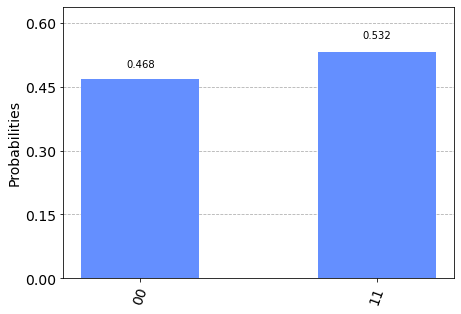

In [17]:
vector_value = result.get_counts()
plot_histogram(vector_value)

In [18]:
#Providing a count of the values - the circuit was run 1024 times (standard setting)
print(vector_value)

{'00': 479, '11': 545}


In [19]:
final_state = result.get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

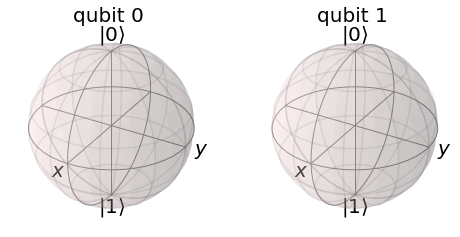

In [20]:
#Notice that now the Bloch-Sphere does not contain any information - printing it is useless
plot_bloch_multivector(final_state)

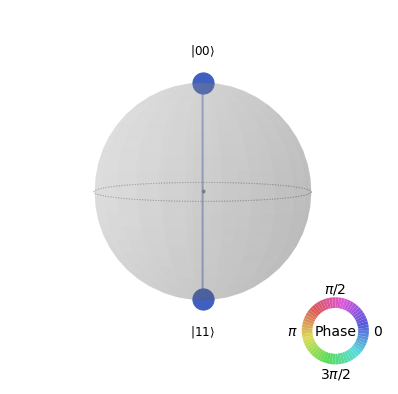

In [21]:
#IBM uses something called a Qsphere for visuialization for statevectors in multi-qubit states. This can also show
#entangled states
plot_state_qsphere(final_state)